# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_csv('TSNE_Subject_1.csv')
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
8198,17.104338,-27.714054,31.265993,0,0
348211,31.981820,-2.688495,22.157097,49,49
208612,31.658827,9.327688,16.480015,33,33
6237,-15.537696,10.231634,-30.691305,0,0
258935,46.088478,19.906141,11.956498,39,39


In [3]:
raw_data.shape

(378535, 5)

In [4]:
raw_data.columns

Index(['TSNE Element 1', 'TSNE Element 2', 'TSNE Element 3', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378535 entries, 0 to 378534
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  378535 non-null  float64
 1   TSNE Element 2  378535 non-null  float64
 2   TSNE Element 3  378535 non-null  float64
 3   stimulus        378535 non-null  int64  
 4   restimulus      378535 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 14.4 MB


In [6]:
raw_data.describe(include='all')

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
count,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000
mean,2.600222,0.867280,-0.335856,13.268231,13.268231
std,23.943234,23.544586,21.883542,17.514047,17.514047
min,-63.968426,-56.519314,-56.300243,0.000000,0.000000
25%,-14.480880,-16.065862,-16.518928,0.000000,0.000000
50%,3.611190,1.511549,0.053881,0.000000,0.000000
75%,19.849892,18.281205,15.525629,28.000000,28.000000
max,60.200820,55.383404,58.472942,52.000000,52.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199821
52      4519
50      4492
51      4487
35      4295
43      4239
40      4211
29      4196
45      4095
39      4036
47      4013
5       3952
46      3905
41      3872
48      3836
49      3831
34      3775
1       3738
31      3725
32      3724
33      3717
3       3706
24      3604
42      3584
18      3583
30      3558
21      3502
28      3391
13      3358
44      3303
38      3256
37      3232
36      3214
14      3168
15      3130
12      3125
19      3079
25      3064
6       3058
10      3038
22      3012
4       2982
16      2966
8       2909
20      2858
23      2764
27      2656
2       2618
7       2615
9       2608
17      2537
11      2491
26      2087
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

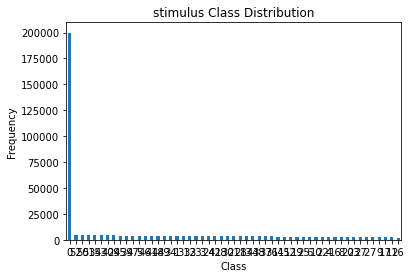

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
131617,-21.023827,0.221067,31.174720,0,0
219080,-16.473757,-15.864663,-26.969072,0,0
53475,27.483006,4.276409,37.534164,9,9
208844,-44.363823,-3.395006,-22.881292,0,0
354163,-0.159270,-50.600388,-18.569649,0,0


In [11]:
raw_data.shape

(378535, 5)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 378534
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  378535 non-null  float64
 1   TSNE Element 2  378535 non-null  float64
 2   TSNE Element 3  378535 non-null  float64
 3   stimulus        378535 non-null  int64  
 4   restimulus      378535 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 17.3 MB


In [13]:
print(raw_data.isnull().any())

TSNE Element 1    False
TSNE Element 2    False
TSNE Element 3    False
stimulus          False
restimulus        False
dtype: bool


In [14]:
X = raw_data.iloc[:,0:3]
y = raw_data.stimulus

# Splitting data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Machine Learning Models

# Decision Tree

In [16]:
from sklearn import tree
import time
start_time = time.time()
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

19.463322639465332 seconds


In [17]:
y_pred1 = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.84154910973741


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     20040
           1       0.76      0.70      0.73       402
           2       0.77      0.79      0.78       254
           3       0.73      0.73      0.73       368
           4       0.83      0.85      0.84       285
           5       0.79      0.79      0.79       381
           6       0.72      0.71      0.72       326
           7       0.81      0.84      0.82       250
           8       0.75      0.74      0.75       296
           9       0.74      0.74      0.74       274
          10       0.71      0.66      0.69       321
          11       0.67      0.68      0.67       257
          12       0.36      0.33      0.34       310
          13       0.75      0.76      0.75       324
          14       0.74      0.71      0.73       332
          15       0.73      0.80      0.76       285
          16       0.63      0.62      0.62       306
 

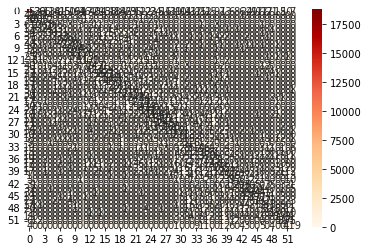

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.8379827759285676
MSE: 47.310218206794524
RMSE: 6.87824237772954


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8679942696823848
Recall Score :  0.8684154910973741
f1_score :  0.8680857315645144


# KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'brute',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'uniform')
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.07885408401489258 seconds


In [23]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 89.61008083689967


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     20040
           1       0.81      0.78      0.80       402
           2       0.85      0.76      0.81       254
           3       0.77      0.70      0.73       368
           4       0.88      0.91      0.89       285
           5       0.83      0.81      0.82       381
           6       0.82      0.73      0.77       326
           7       0.81      0.84      0.83       250
           8       0.86      0.73      0.79       296
           9       0.70      0.82      0.76       274
          10       0.92      0.63      0.75       321
          11       0.75      0.56      0.64       257
          12       0.64      0.32      0.42       310
          13       0.86      0.78      0.82       324
          14       0.80      0.74      0.77       332
          15       0.84      0.81      0.82       285
          16       0.70      0.66      0.68       306
 

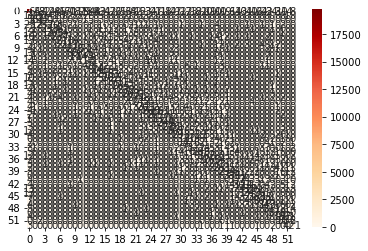

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.424816399852063
MSE: 37.631399587890314
RMSE: 6.134443706473336


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8937608059220741
Recall Score :  0.8961008083689966
f1_score :  0.8927526972068719


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
RandomForestClassifier = RandomForestClassifier(bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 100,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

552.1686480045319 seconds


In [29]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 89.94029693031119


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     20040
           1       0.84      0.76      0.79       402
           2       0.87      0.77      0.82       254
           3       0.82      0.73      0.77       368
           4       0.91      0.88      0.89       285
           5       0.84      0.81      0.82       381
           6       0.84      0.70      0.76       326
           7       0.88      0.84      0.86       250
           8       0.87      0.73      0.79       296
           9       0.79      0.77      0.78       274
          10       0.84      0.64      0.72       321
          11       0.76      0.68      0.72       257
          12       0.53      0.33      0.41       310
          13       0.86      0.77      0.81       324
          14       0.85      0.71      0.78       332
          15       0.83      0.84      0.83       285
          16       0.77      0.67      0.72       306
 

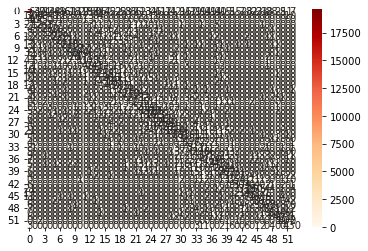

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1.4163100332857823
MSE: 37.305991440798856
RMSE: 6.1078630830102


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8965251803505848
Recall Score :  0.8994029693031119
f1_score :  0.8966752198191771


# ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import time
start_time = time.time()
extratree = ExtraTreesClassifier(bootstrap = False,
                                 ccp_alpha = 0.0,
                                 class_weight = None,
                                 criterion = 'entropy',
                                 max_depth = None,
                                 max_features = 'auto',
                                 max_leaf_nodes = None,
                                 max_samples = None,
                                 min_impurity_decrease = 0.0,
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 min_weight_fraction_leaf = 0.0,
                                 n_estimators = 100,
                                 n_jobs = None,
                                 oob_score = False,
                                 random_state = None,
                                 verbose = 0,
                                 warm_start = False)
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

85.72997403144836 seconds


In [35]:
y_pred5 = extratree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 89.8742537116289


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     20040
           1       0.82      0.76      0.79       402
           2       0.85      0.78      0.81       254
           3       0.80      0.75      0.77       368
           4       0.92      0.88      0.90       285
           5       0.83      0.82      0.82       381
           6       0.85      0.72      0.78       326
           7       0.86      0.84      0.85       250
           8       0.85      0.74      0.79       296
           9       0.81      0.77      0.79       274
          10       0.80      0.66      0.72       321
          11       0.75      0.72      0.74       257
          12       0.50      0.33      0.40       310
          13       0.83      0.78      0.81       324
          14       0.84      0.73      0.78       332
          15       0.81      0.83      0.82       285
          16       0.74      0.68      0.71       306
 

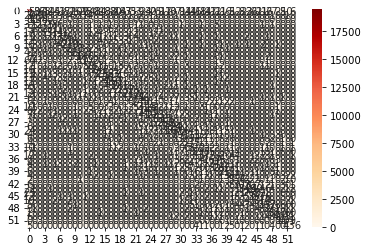

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 1.4103925608918477
MSE: 37.077217731283355
RMSE: 6.089106480534181


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8960962727880786
Recall Score :  0.8987425371162889
f1_score :  0.8966044468637848


# XGBoost

In [40]:
from xgboost import XGBClassifier
import time
start_time = time.time()
xgb = XGBClassifier(predictor = 'gpu_predictor')
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1530.200190782547 seconds


In [41]:
y_pred4 = xgb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.49426744861837


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     20040
           1       0.76      0.68      0.72       402
           2       0.84      0.75      0.79       254
           3       0.77      0.66      0.71       368
           4       0.87      0.82      0.84       285
           5       0.78      0.78      0.78       381
           6       0.74      0.60      0.67       326
           7       0.88      0.79      0.83       250
           8       0.83      0.57      0.68       296
           9       0.72      0.69      0.70       274
          10       0.84      0.60      0.70       321
          11       0.68      0.63      0.66       257
          12       0.51      0.32      0.39       310
          13       0.83      0.69      0.75       324
          14       0.86      0.65      0.74       332
          15       0.82      0.75      0.78       285
          16       0.62      0.56      0.59       306
 

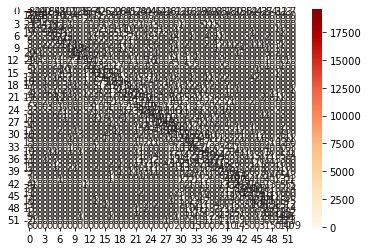

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 2.143313784540603
MSE: 58.72491678554446
RMSE: 7.663218435197085


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8505663615764356
Recall Score :  0.8549426744861838
f1_score :  0.8498845242175778
